In [1]:
import os
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error
from IPython.display import Javascript

warnings.filterwarnings('ignore')
style = {'description_width': 'initial'}
pd.options.display.max_columns=None

In [6]:
df = pd.read_csv("../data/raw/playground-series-s4e4/train.csv")

In [3]:
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [4]:
class Report:
    def __init__(self, dataframe: pd.DataFrame) -> None:
        self.dataframe = dataframe
        
    def hist_plot(self, feature_name: str):
        plt.figure(figsize=(20, 8))
        sns.histplot(data=self.dataframe[feature_name])
        plt.title(f"{feature_name}")
        plt.show()

In [5]:
report = Report(df)

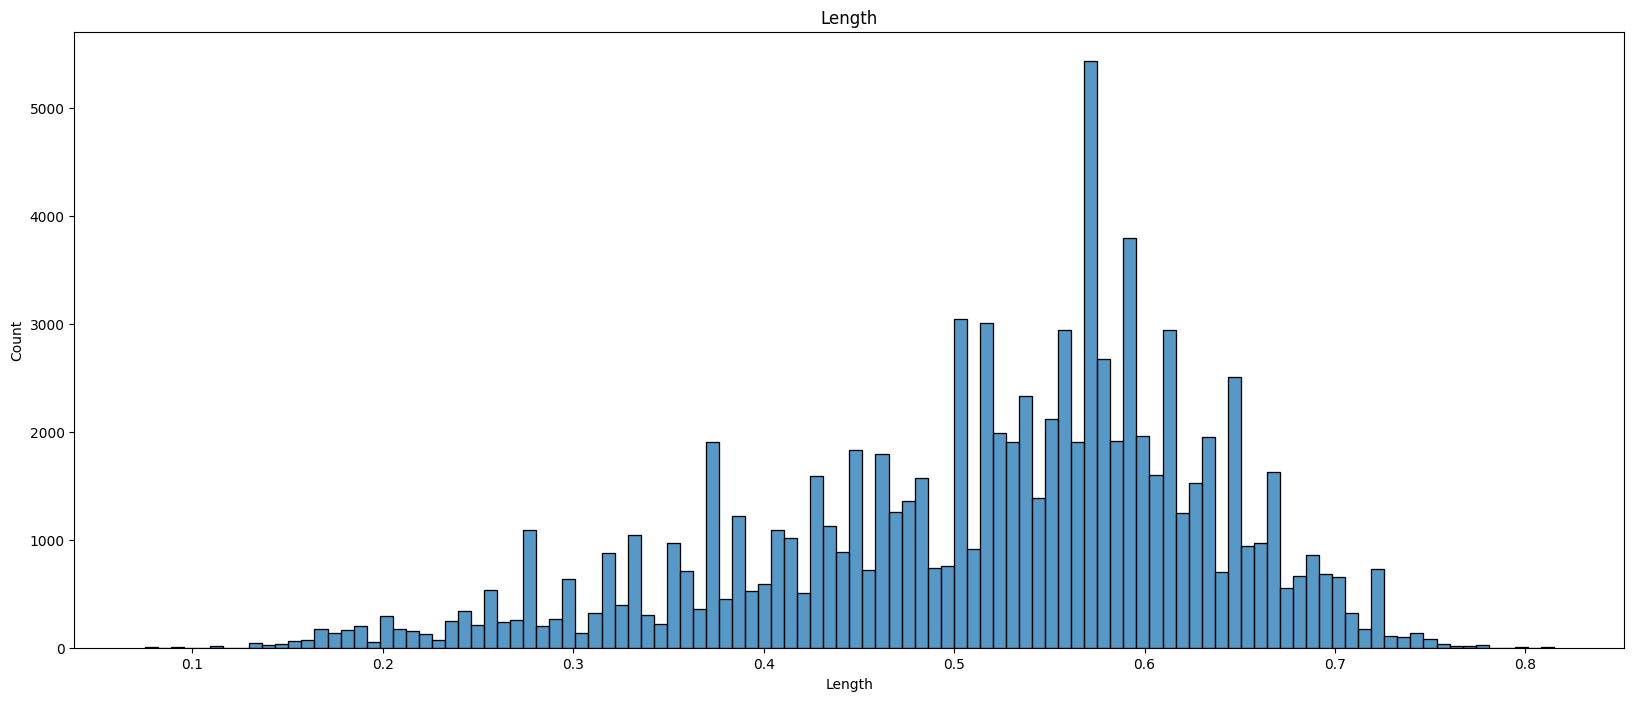

In [6]:
report.hist_plot('Length')

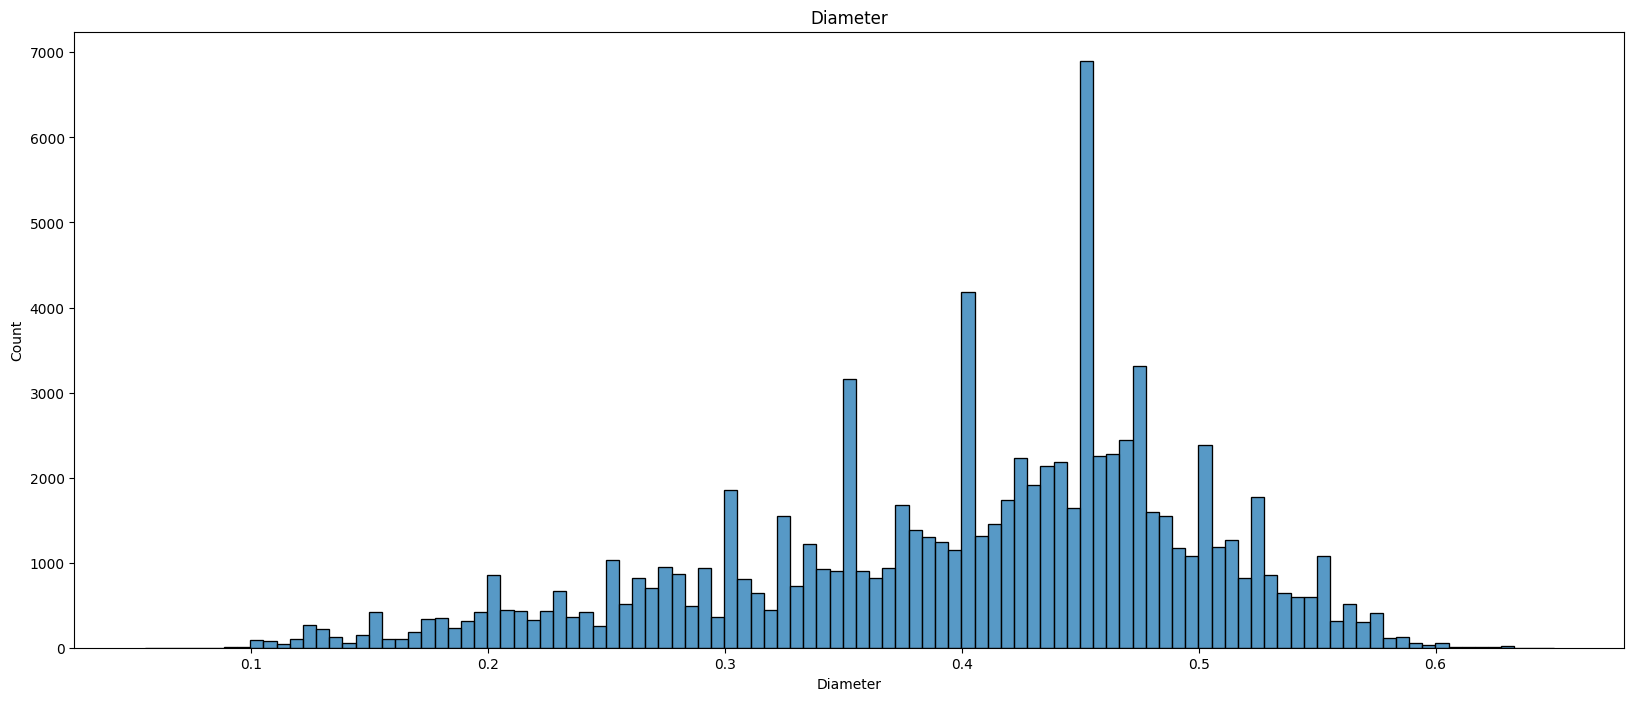

In [7]:
report.hist_plot("Diameter")

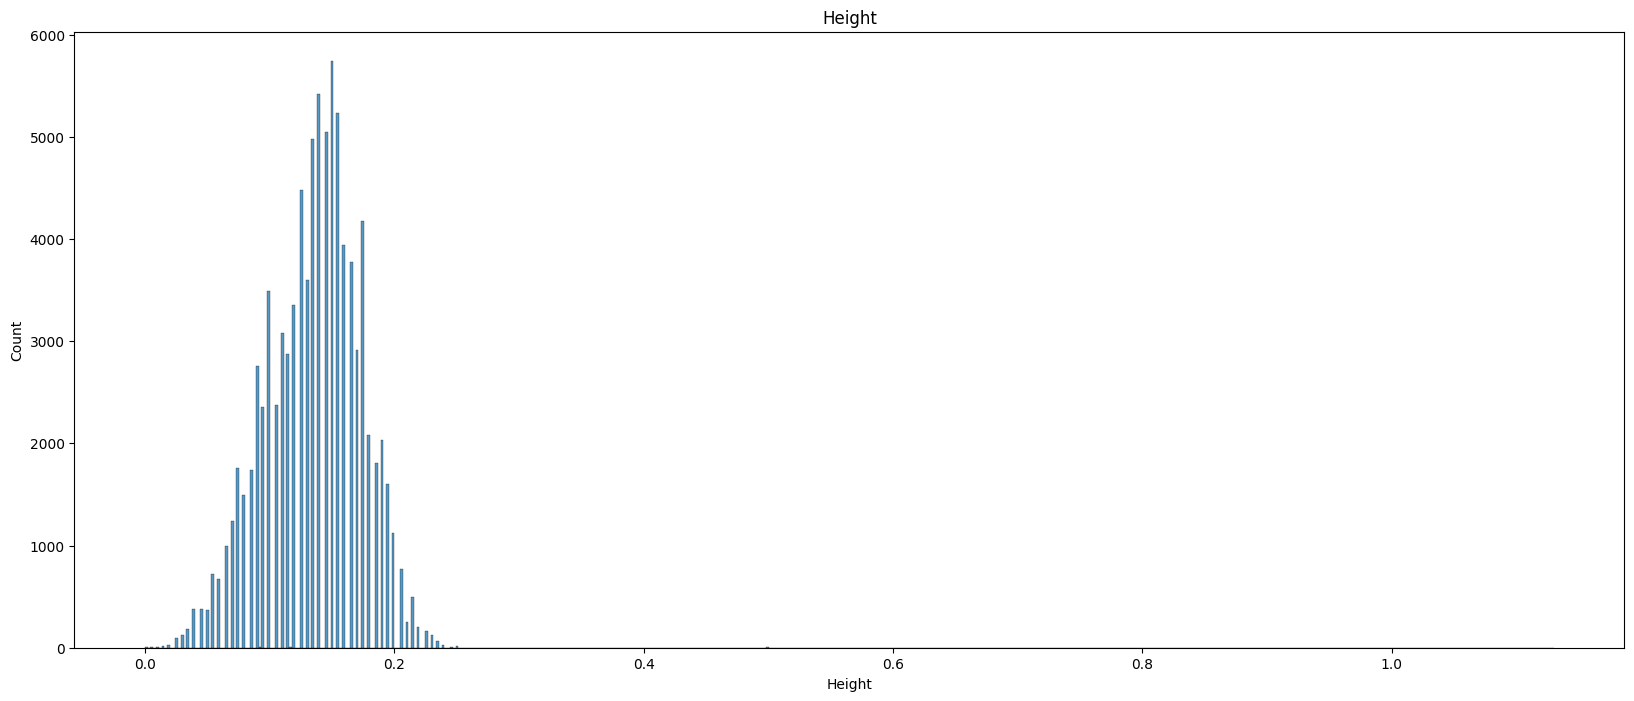

In [8]:
report.hist_plot('Height')

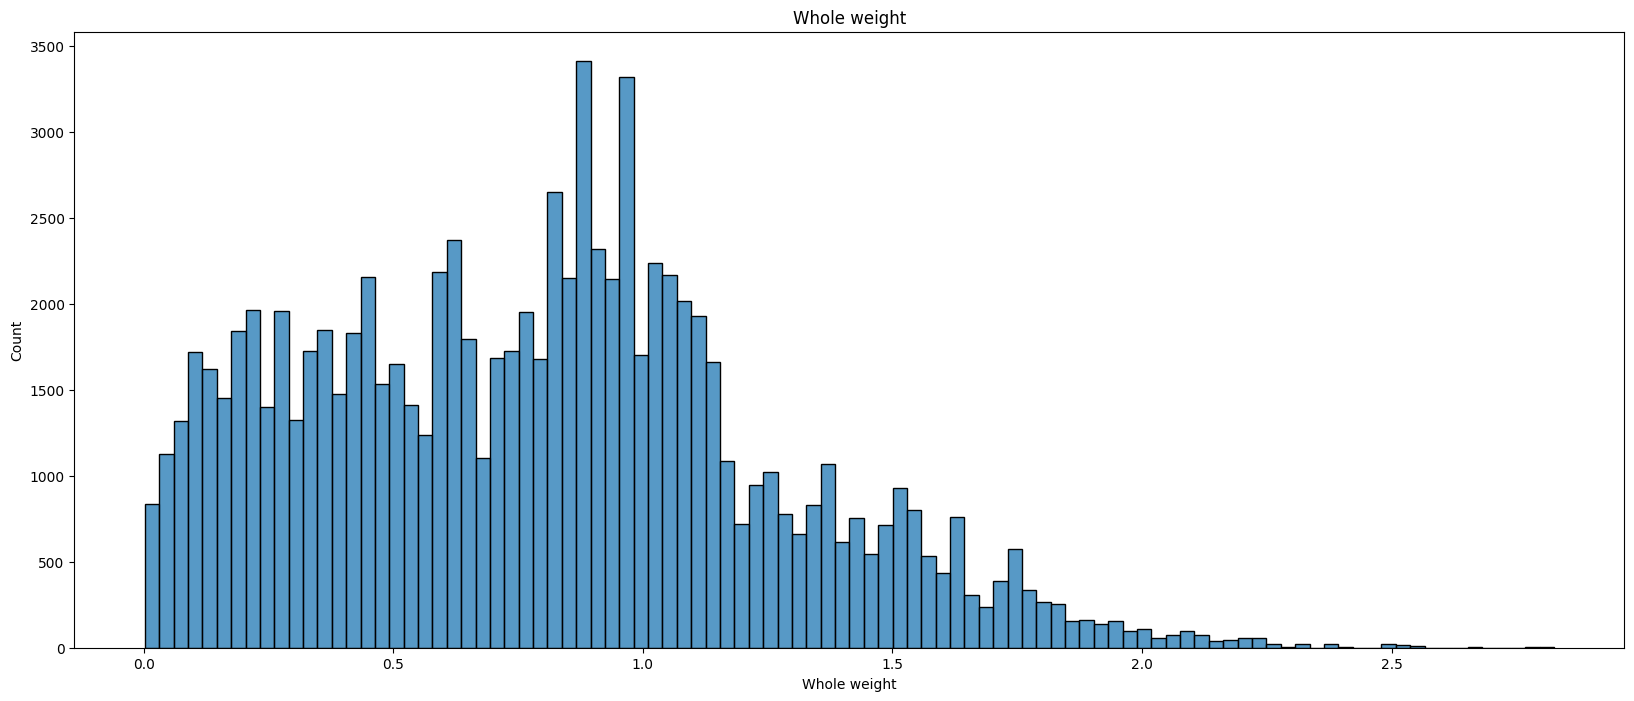

In [9]:
report.hist_plot("Whole weight")

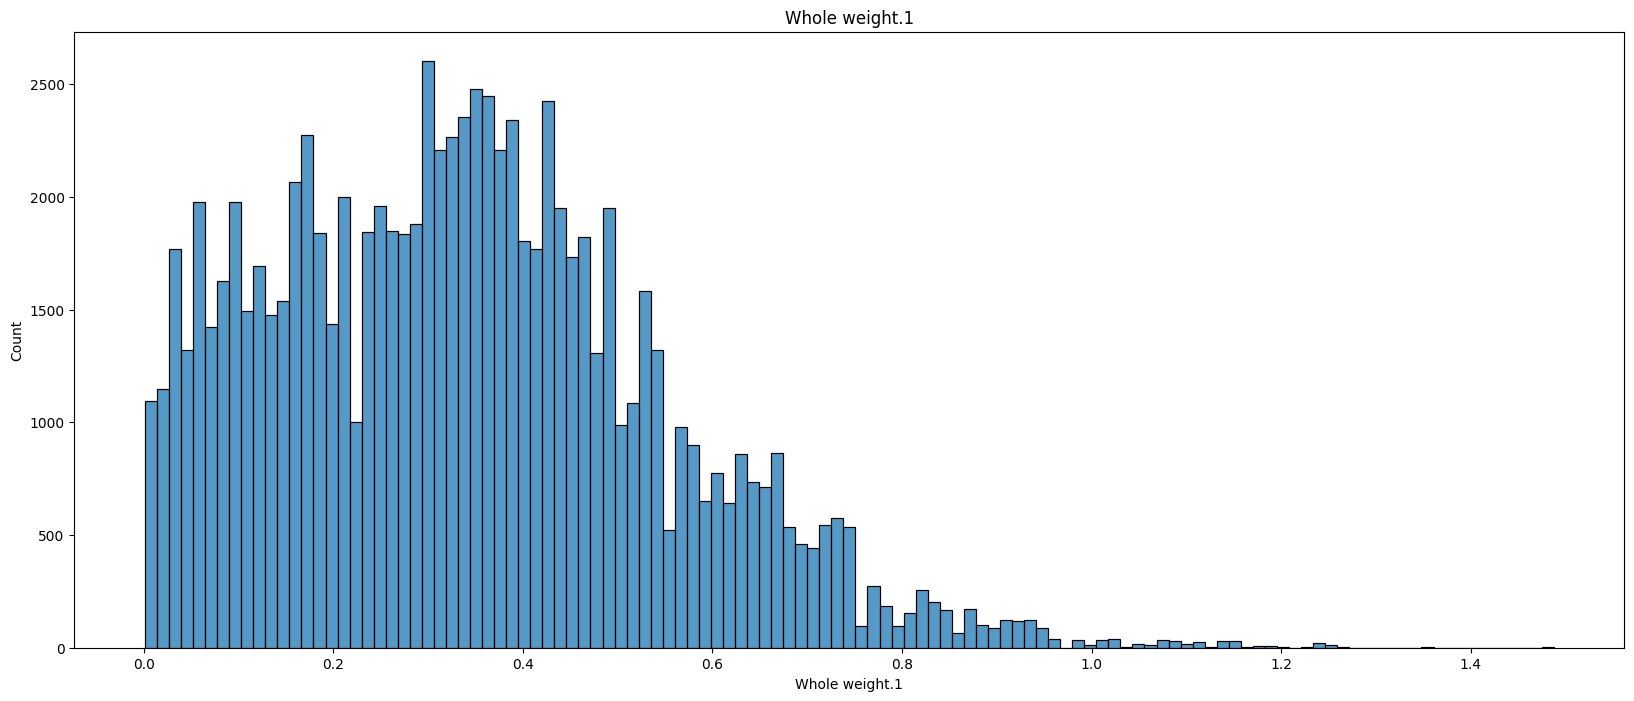

In [10]:
report.hist_plot("Whole weight.1")

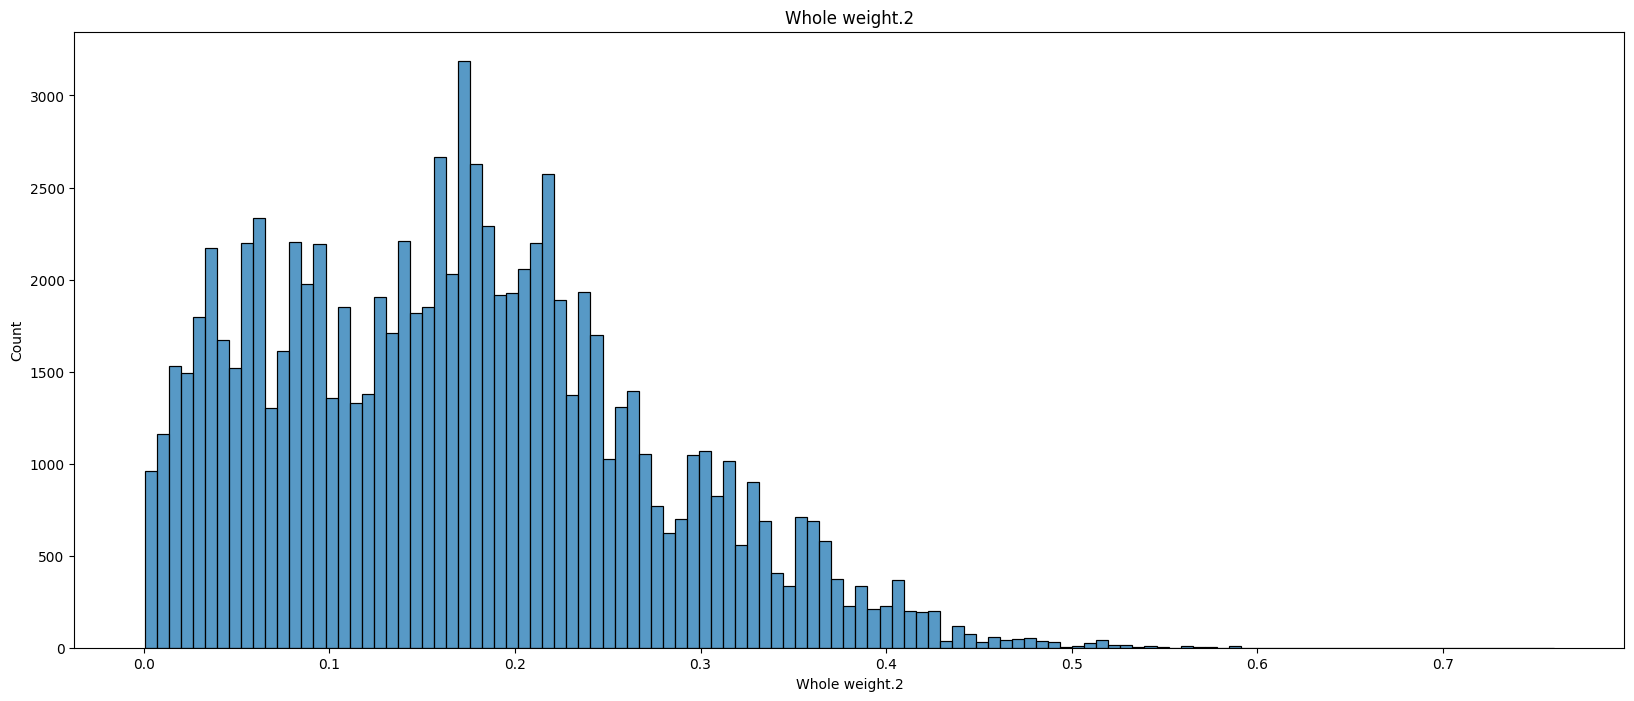

In [11]:
report.hist_plot("Whole weight.2")

In [12]:
def drop_features(df, feature):
    df = df.drop([feature], axis=1, inplace=True)
    return df

In [13]:
drop_features(df, 'id')

In [14]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Whole weight.1    float64
Whole weight.2    float64
Shell weight      float64
Rings               int64
dtype: object

In [15]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [16]:
class encoding(BaseEstimator, TransformerMixin):
    def __init__(self, column_1=['Sex']):
        self.column_1 = column_1
    def fit(self, df):
        return self
    def transform(self, df):
        oe = OrdinalEncoder()
        df[self.column_1] = oe.fit_transform(df[self.column_1])
        return df

In [17]:
class feature_scaling(BaseEstimator, TransformerMixin):
    def __init__(self, column_3=['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight']):
        self.column_3 = column_3
    def fit(self, df):
        return self
    def transform(self, df):
        if (set(self.column_3).issubset(df.columns)):
            stc = Normalizer()
            df[self.column_3] = stc.fit_transform(df[self.column_3])
            return df
        else:
            print("Error")
            return df

In [18]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [19]:
pipe = Pipeline([
    ('encoding', encoding()),
    ('scaler', feature_scaling()),
])

In [20]:
pipe

Pipeline(steps=[('encoding', encoding()), ('scaler', feature_scaling())])

In [21]:
pipe.fit_transform(df)

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0.0,0.483857,0.378288,0.131961,0.678719,0.288994,0.128882,0.211138,11
1,0.0,0.413300,0.321456,0.095125,0.741316,0.300463,0.181393,0.209930,11
2,1.0,0.811960,0.558223,0.126869,0.106570,0.027911,0.015224,0.025374,6
3,2.0,0.458481,0.366014,0.115583,0.704674,0.289344,0.158349,0.192639,10
4,1.0,0.483393,0.370166,0.113227,0.681105,0.321827,0.139357,0.172018,9
...,...,...,...,...,...,...,...,...,...
90610,2.0,0.737586,0.517411,0.165131,0.348977,0.150820,0.081465,0.099079,6
90611,2.0,0.449615,0.344300,0.121518,0.712093,0.313110,0.147036,0.194428,9
90612,1.0,0.651275,0.494071,0.142233,0.481345,0.226075,0.117529,0.122021,6
90613,1.0,0.683933,0.535252,0.148681,0.396483,0.194277,0.097138,0.138769,6


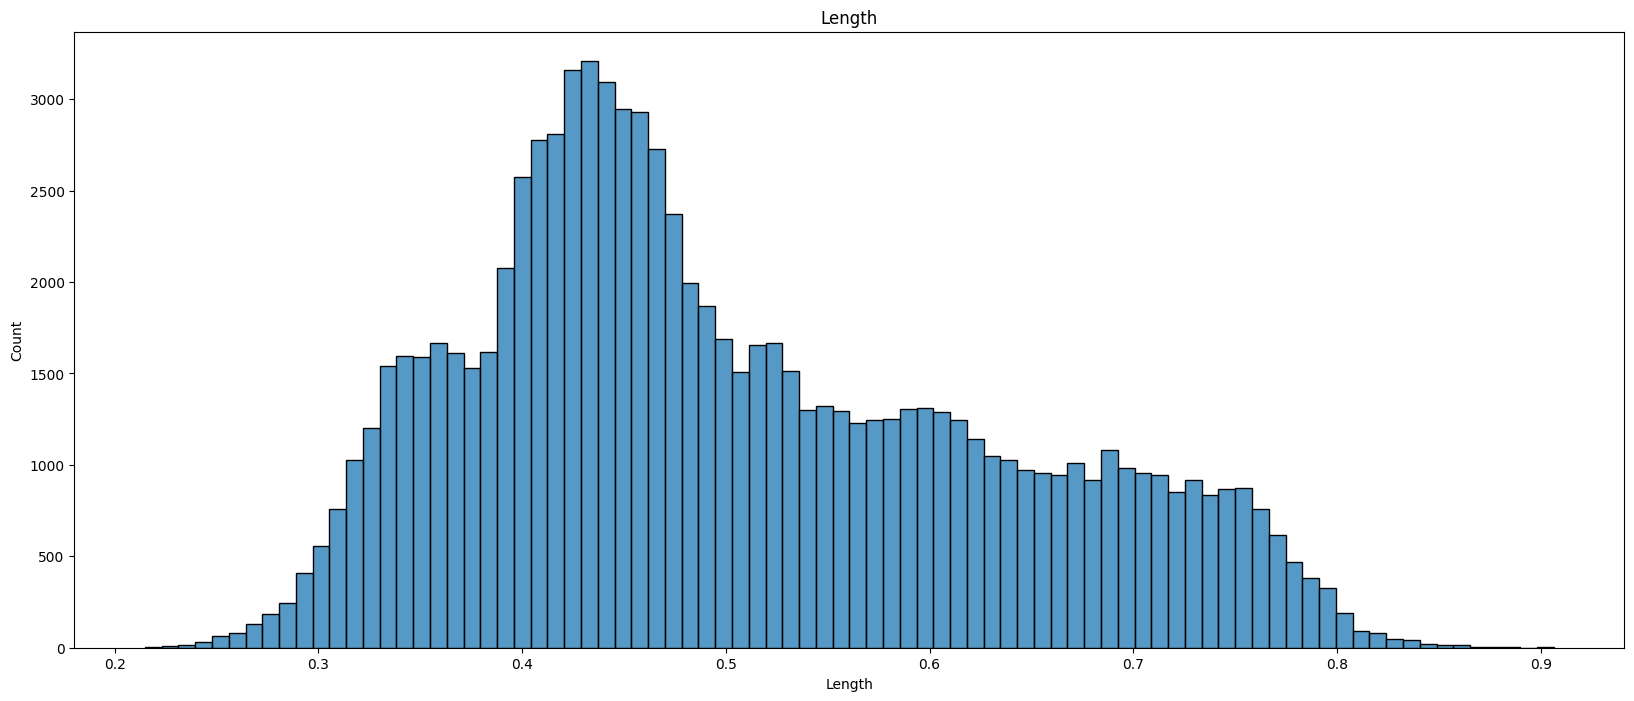

In [22]:
report.hist_plot('Length')

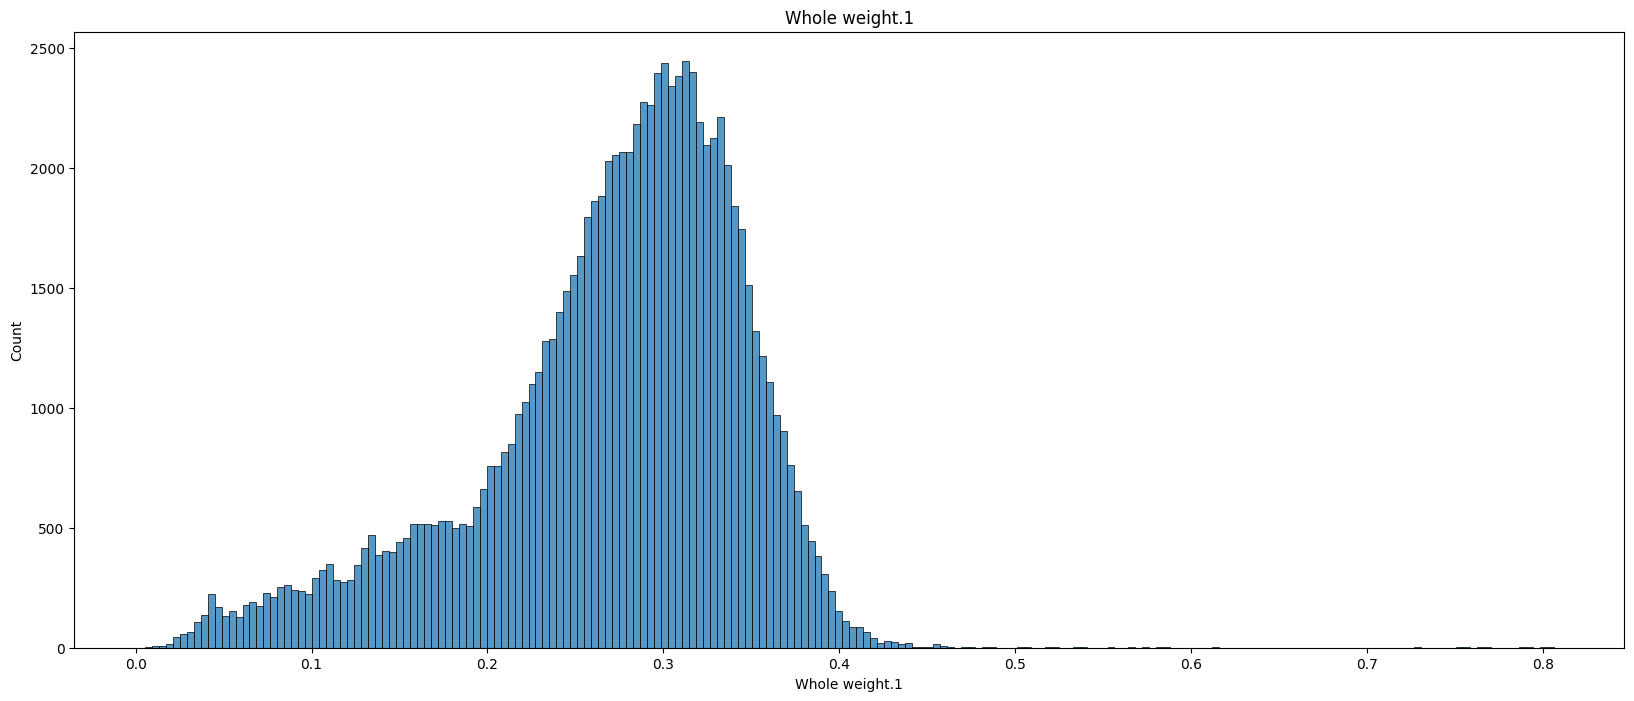

In [23]:
report.hist_plot("Whole weight.1")

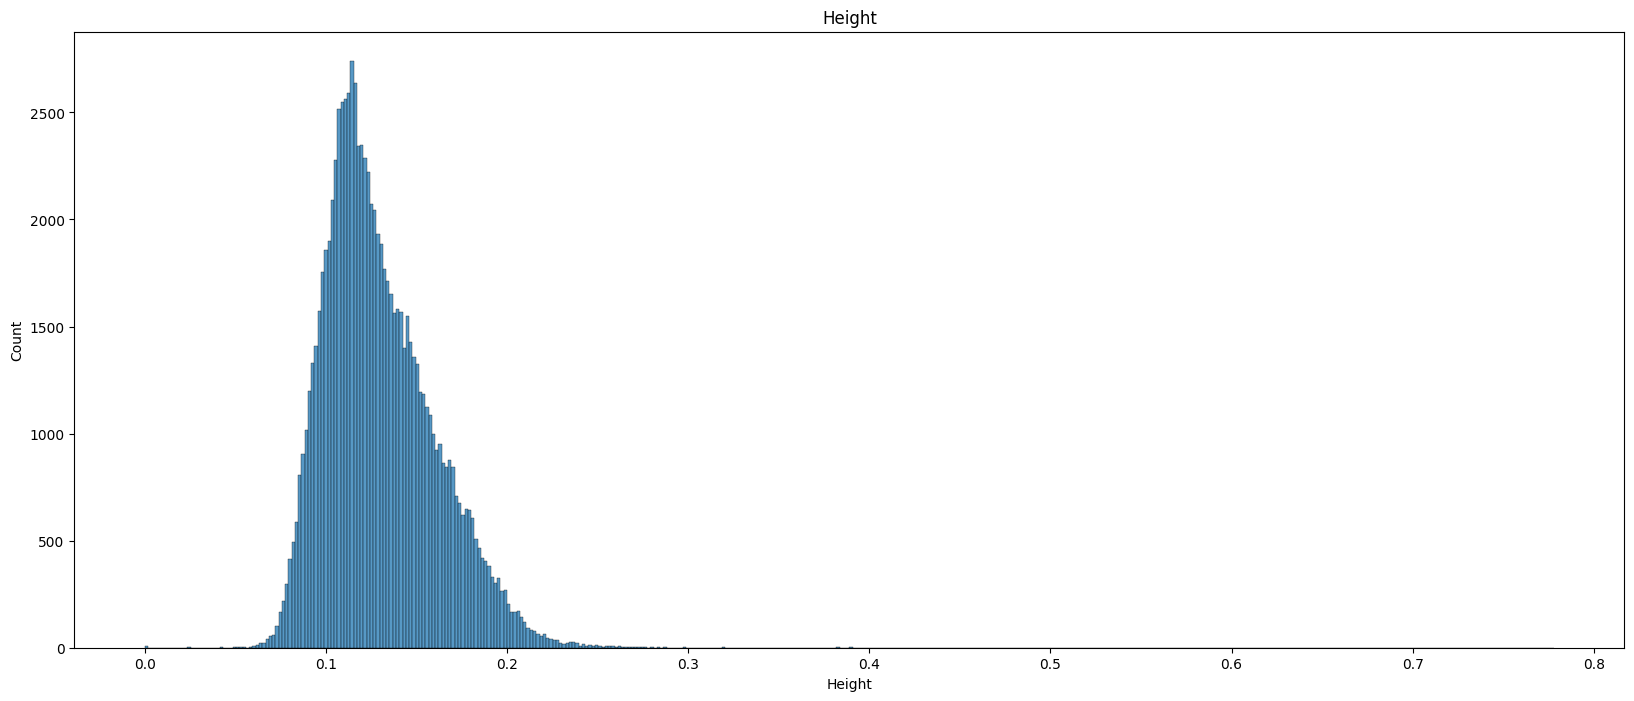

In [24]:
report.hist_plot('Height')

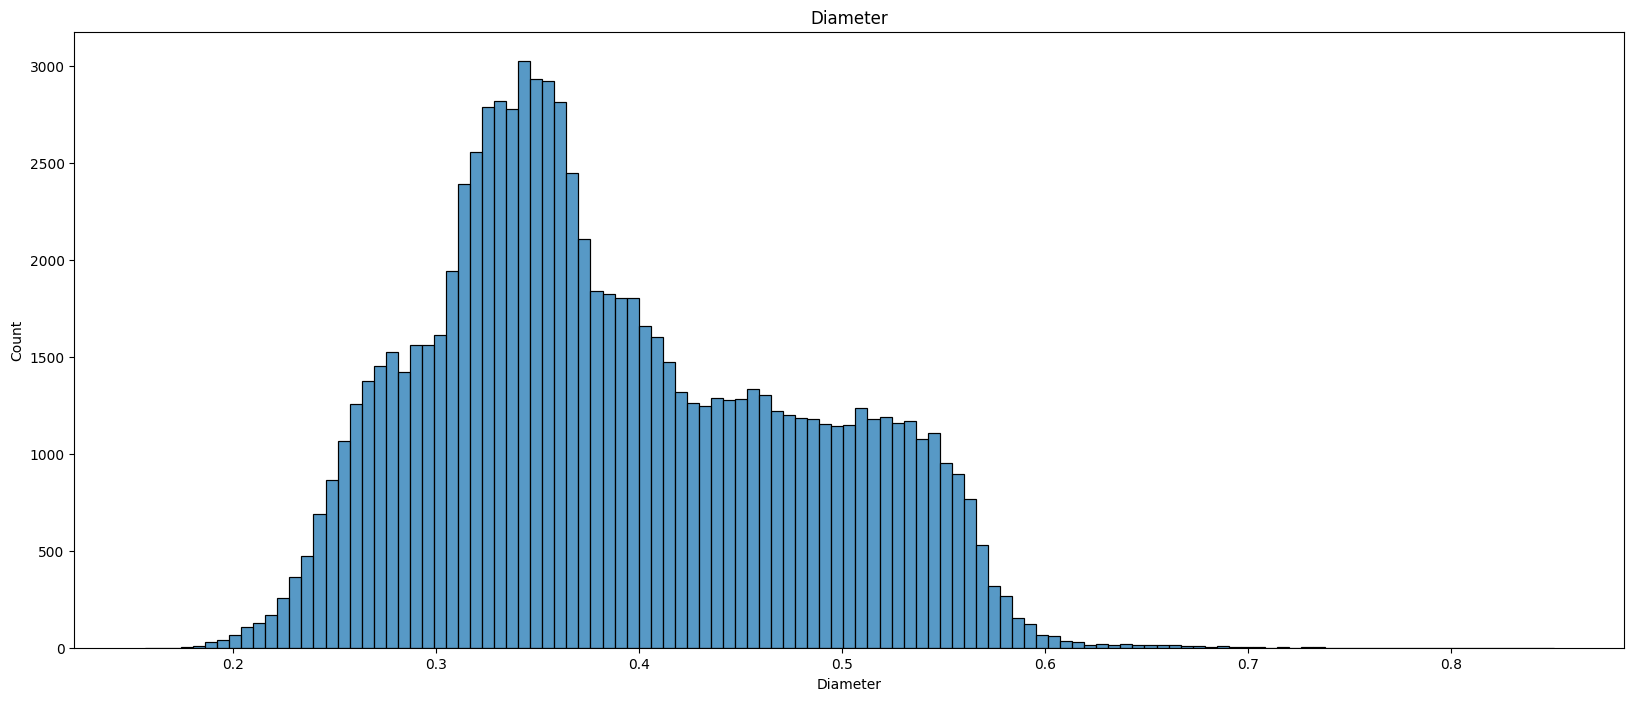

In [25]:
report.hist_plot("Diameter")

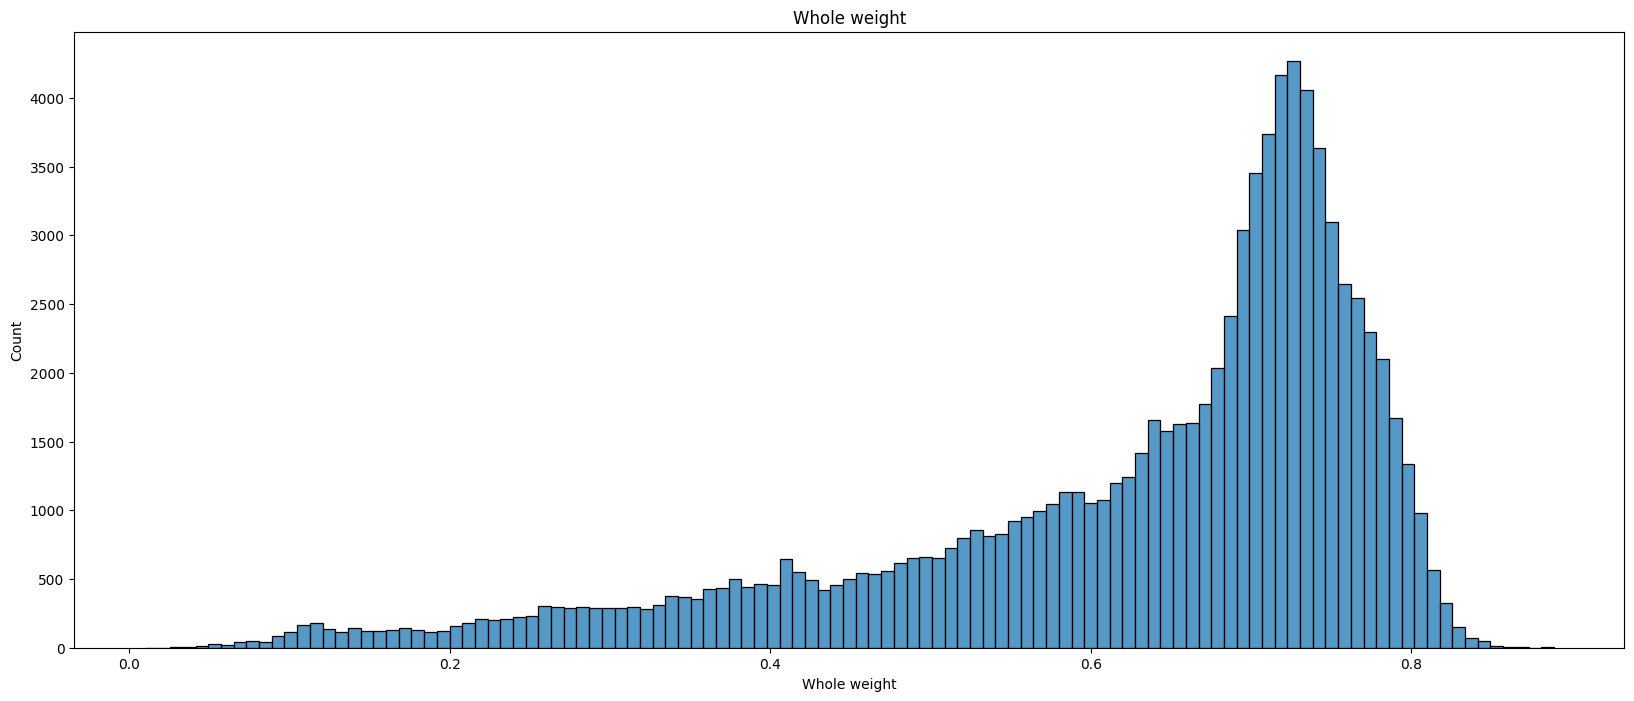

In [26]:
report.hist_plot("Whole weight")

In [27]:
df = df.sample(20000, random_state=42)

In [28]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [32]:
catboost_params = {
    'depth': 15,
    'max_bin': 464, 
    'verbose': False,
    'min_data_in_leaf': 78, 
    'loss_function': 'RMSE', 
    'grow_policy': 'Lossguide', 
    'bootstrap_type': 'Bernoulli', 
    'subsample': 0.83862137638162, 
    'l2_leaf_reg': 8.365422739510098, 
    'random_strength': 3.296124856352495, 
    'learning_rate': 0.09992185242598203, 
}

In [33]:
models = {
    'lda': LinearDiscriminantAnalysis(),
    'Random_Forest': RandomForestRegressor(n_estimators=150),
    'Ada_boost': AdaBoostRegressor(n_estimators=150),
    'Gradient_boost': GradientBoostingRegressor(n_estimators=150,learning_rate=1e-3),
    'Bagging_Classifer': BaggingRegressor(n_estimators=200, max_features=0.5, max_samples=1.0),
    'Decision_tree': DecisionTreeRegressor(),
    'Extr_tree': ExtraTreesRegressor(n_estimators = 200),
    'Catboost': CatBoostRegressor(**catboost_params)
}

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [35]:
def train_model(model, model_name, x=x_train, y=y_train, x_test = x_test, y_test = y_test):
    print("------------------------------", model_name , "------------------------------------------")
    model = model.fit(x, y)
    y_pred = model.predict(x_test)
    r2_score_train = r2_score(model.predict(x_train), y_train)
    r2_score_test = r2_score(y_pred, y_test)
    print("train")
    print("Mean score", ":", mean_squared_error(y_pred, y_test))
    print("Mean SQRT score", ":", np.sqrt(mean_squared_error(y_pred, y_test)))
    print("MSLE", ":", mean_squared_log_error(y_pred, y_test))
    print("RMSLE", ":", np.sqrt(mean_squared_log_error(y_pred, y_test)))
    os.makedirs("./artifacts",exist_ok=True)
    with open(f'./artifacts/{model_name}.pkl','wb') as f:
        pickle.dump(model,f)

In [36]:
for model_name, model in models.items():
    train_model(model, model_name)

------------------------------ lda ------------------------------------------
train
Mean score : 4.6365
Mean SQRT score : 2.1532533524878117
MSLE : 0.03016656006589519
RMSLE : 0.17368523272257544
------------------------------ Random_Forest ------------------------------------------
train
Mean score : 3.3736614777777776
Mean SQRT score : 1.836752971354008
MSLE : 0.023559402366743674
RMSLE : 0.15349072404136893
------------------------------ Ada_boost ------------------------------------------
train
Mean score : 9.99649562512057
Mean SQRT score : 3.161723521296663
MSLE : 0.07800129436878626
RMSLE : 0.2792871181576162
------------------------------ Gradient_boost ------------------------------------------
train
Mean score : 8.244172567160291
Mean SQRT score : 2.8712667182204252
MSLE : 0.06956192543139267
RMSLE : 0.26374594865398915
------------------------------ Bagging_Classifer ------------------------------------------
train
Mean score : 3.4424775205642364
Mean SQRT score : 1.85539147

In [29]:
import torch
import torch_directml
from torch import nn

In [41]:
device = 'cpu'

In [42]:
class TrainTestSplit:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def NumpyToTensor(self) -> tuple[torch.Tensor, torch.Tensor]:
        x = torch.from_numpy(self.x.values).type(torch.float)
        y = torch.from_numpy(self.y.values).type(torch.float)
        return x, y
        
    def SplitData(self) -> tuple[torch.Tensor, torch.Tensor, torch.Tensor, torch.Tensor]:
        x_tensor, y_tensor = self.NumpyToTensor()
        x_train, x_test, y_train, y_test = train_test_split(x_tensor, y_tensor, test_size=0.3)
        return x_train, x_test, y_train, y_test

In [43]:
data_1 = TrainTestSplit(x, y)
x_train, x_test, y_train, y_test = data_1.SplitData()

In [44]:
class ModelV1(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layer_1 = nn.Linear(in_features=8, out_features=32)
        self.layer_2 = nn.Linear(in_features=32, out_features=64)
        self.layer_3 = nn.Linear(in_features=64, out_features=32)
        self.layer_4 = nn.Linear(in_features=32, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        a = self.layer_1(x)
        a = self.relu(a)
        a = self.layer_2(a)
        a = self.relu(a)
        a = self.layer_3(a)
        a = self.relu(a)
        a = self.layer_4(a)
        return a

In [45]:
class TrainModelV2:
    def __init__(self, model, x_train, y_train, x_test, y_test, epochs=200, lr=0.01):
        self.epochs = epochs
        self.model = model
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.y_test = y_test
        self.loss_fn = nn.L1Loss()
        self.optimizer = torch.optim.SGD(params=model_1.parameters(), lr=lr)

    def Train(self):
        torch.manual_seed(42)
        for epoch in range(1, self.epochs + 1):
            self.model.train()
            y_pred = self.model(self.x_train)
            loss = self.loss_fn(y_pred, self.y_train)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
        
            if epoch % 5 == 0:
                self.model.eval()
                with torch.inference_mode():
                    test_pred = self.model(self.x_test)
                    test_loss = self.loss_fn(test_pred, self.y_test)
                print(f"Validation Loss after {epoch} epochs: {test_loss.item()}")

In [46]:
model_1 = ModelV1().to(device)

In [47]:
x_train_dml = torch.tensor(x_train, dtype=torch.float, device=device)
y_train_dml = torch.tensor(y_train, dtype=torch.long, device=device)
x_test_dml = torch.tensor(x_test, dtype=torch.float, device=device)
y_test_dml = torch.tensor(y_test, dtype=torch.long, device=device)

train_1 = TrainModelV2(model=model_1, x_train=x_train_dml, y_train=y_train_dml, x_test=x_test_dml, y_test=y_test_dml, epochs=500, lr=1e-2)

In [ ]:
train_1.Train()

In [80]:
test_df  = pd.read_csv("../data/raw/playground-series-s4e4/test.csv")

In [52]:
test_df

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
...,...,...,...,...,...,...,...,...,...
60406,151021,I,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500
60407,151022,F,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050
60408,151023,I,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650
60409,151024,F,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350


In [36]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [37]:
test_df_1 = test_df[['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1',
       'Whole weight.2', 'Shell weight']]

In [38]:
test_df_1

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
...,...,...,...,...,...,...,...,...
60406,I,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500
60407,F,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050
60408,I,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650
60409,F,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350


In [39]:
pipe.fit_transform(test_df_1)

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,2.0,0.387626,0.285461,0.093150,0.744001,0.371700,0.187803,0.180591
1,2.0,0.421592,0.334366,0.116301,0.714525,0.347813,0.159551,0.199893
2,2.0,0.468214,0.351161,0.117054,0.701903,0.294724,0.154260,0.201081
3,2.0,0.455757,0.391791,0.115938,0.698828,0.281850,0.149121,0.187900
4,1.0,0.612928,0.480004,0.162463,0.528743,0.232617,0.098955,0.155078
...,...,...,...,...,...,...,...,...
60406,1.0,0.713260,0.537529,0.175731,0.366967,0.151955,0.054787,0.103371
60407,0.0,0.443900,0.346665,0.122601,0.714045,0.328486,0.141202,0.173332
60408,1.0,0.408182,0.304407,0.107234,0.776237,0.271890,0.138367,0.183336
60409,0.0,0.345876,0.275128,0.099570,0.782674,0.308406,0.187349,0.227963


In [40]:
with open('./artifacts/Gradient_boost.pkl', 'rb') as file:
    model = pickle.load(file)

In [41]:
model

GradientBoostingRegressor(n_estimators=250)

In [42]:
predictions = []
for i in range(len(test_df_1)):
    row_values = list(test_df_1.iloc[i].values)
    prediction = model.predict([row_values])
    predictions.append(round(predictions[0], 0))

In [43]:
data = pd.DataFrame(predictions, columns=['Rings'])

In [44]:
submission = pd.concat([test_df['id'], data['Rings']], axis=1)

In [45]:
submission

,id,Rings
0,90615,10.0
1,90616,10.0
2,90617,10.0
3,90618,10.0
4,90619,7.0
...,...,...
60406,151021,6.0
60407,151022,9.0
60408,151023,12.0
60409,151024,14.0


In [46]:
submission.to_csv("submission5.csv", index=False)

In [3]:
data_1 = pd.read_csv("../data/processed/submission.csv")

In [5]:
data_1['Rings'].unique()

array([ 9., 10.,  8., 12.,  6., 11.,  7.,  5., 16., 13.,  4., 14.,  3.,
       15., -3., 17., 21.,  1., 18., -2., 22.,  2., 23.])

In [7]:
df['Rings'].unique()

array([11,  6, 10,  9,  4,  8, 15,  7, 12, 20, 17, 13, 14,  5, 23,  3, 22,
       16, 18, 19, 21, 25,  1, 29,  2, 27, 24, 26], dtype=int64)